# Modelagem

### Bibliotecas

In [2]:
from os import listdir
from pickle import dump
import keras
# from keras.applications.vgg16 import VGG16
# from keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img
# from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
# from keras.applications import  resnet50
# from keras.applications import resnet
# from tensorflow.python.keras.applications.resnet import ResNet50 as resnet50
from tensorflow.keras.applications import ResNet50
from keras.models import Model
import os
from PIL import Image
import pandas as pd

import tqdm
import matplotlib.pyplot as plt
import random 
import tensorflow
import numpy.core.multiarray
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from sklearn.model_selection import RepeatedStratifiedKFold, LeaveOneOut, StratifiedShuffleSplit

from keras.models import load_model

import sklearn
import subprocess
import time
# import PIL
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')



from lightgbm import LGBMClassifier

from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import auc, roc_curve, roc_auc_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution

import time
from sklearn.metrics  import average_precision_score, make_scorer, roc_curve,f1_score, precision_score, recall_score, fbeta_score, auc, roc_auc_score, accuracy_score, confusion_matrix, classification_report,precision_recall_curve


import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

c:\Anaconda\envs\artigo\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Funções auxiliares

In [28]:
def fit_and_print(model, X_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm)                      
    plt.figure(figsize=(8,6))  
    sns.heatmap(cm_df, annot=True)
    print("Classification Report: \n", classification_report(y_test, y_pred))  


    roc_auc = roc_auc_score(y_test, y_pred, multi_class = 'ovr', average=None)
    gini = 2*roc_auc -1
    print("Gini: ",gini)
    print("ROC AUC:: ",roc_auc)
    
    


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Leitura dos dados

In [4]:
train_normal = pd.read_csv('data/features_train_NORMAL.csv') 
train_pneumonia = pd.read_csv('data/features_train_PNEUMONIA.csv') 
test_normal = pd.read_csv('data/features_test_NORMAL.csv') 
test_pneumonia = pd.read_csv('data/features_test_PNEUMONIA.csv') 
val_normal = pd.read_csv('data/features_val_NORMAL.csv') 
val_pneumonia = pd.read_csv('data/features_val_PNEUMONIA.csv')

In [5]:
train_normal.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,8.030253e-07,0.000009,0.000017,0.000724,0.000036,1.137662e-06,7.585679e-06,1.365604e-07,4.690241e-07,3.792116e-07,...,3.977842e-07,1.843780e-07,2.469885e-08,8.963966e-09,1.305061e-07,1.066745e-07,6.338824e-07,1.134629e-08,0.000153,0.000870
1,8.543582e-06,0.000136,0.000035,0.002230,0.000114,4.040247e-06,1.052312e-05,4.133533e-05,4.052147e-06,2.338420e-06,...,1.463699e-06,4.915610e-07,3.352001e-07,9.594637e-08,3.922321e-06,1.910834e-06,3.039644e-05,7.112688e-08,0.000108,0.000347
2,4.860348e-07,0.000003,0.000031,0.001357,0.000041,2.204841e-07,3.746792e-07,6.930670e-08,4.367935e-08,6.756602e-08,...,1.171786e-07,6.659896e-09,3.649183e-09,2.374704e-09,2.867081e-08,4.006484e-08,7.181430e-07,6.823269e-09,0.000023,0.000030
3,1.596785e-06,0.000008,0.000004,0.000374,0.000020,4.659951e-08,5.733667e-07,7.739556e-08,7.139975e-08,3.411960e-08,...,6.221602e-08,5.327104e-09,1.708283e-08,7.948706e-10,2.329523e-08,1.155800e-08,3.170211e-07,1.690163e-08,0.000148,0.002563
4,3.259233e-06,0.000032,0.000062,0.006291,0.000078,8.776717e-07,5.650817e-06,2.229028e-05,6.193986e-06,1.380488e-06,...,2.914699e-07,1.114175e-06,5.342975e-07,9.735795e-08,1.374624e-06,4.399171e-07,2.088362e-05,8.871561e-08,0.000017,0.000270


In [6]:
train_normal['Y'] = 0
test_normal['Y'] = 0
val_normal['Y'] = 0
train_pneumonia['Y'] = 1
test_pneumonia['Y'] = 1
val_pneumonia['Y'] = 1

In [7]:
train = pd.concat([train_normal, train_pneumonia], axis=0)
train.shape

(5216, 1001)

In [8]:
train.Y.value_counts()/len(train)

1    0.742906
0    0.257094
Name: Y, dtype: float64

In [9]:
test = pd.concat([test_normal, test_pneumonia], axis=0)
test.shape

(624, 1001)

In [10]:
test.Y.value_counts()/len(test)

1    0.625
0    0.375
Name: Y, dtype: float64

In [11]:
val = pd.concat([val_normal, val_pneumonia], axis=0)
val.shape

(16, 1001)

In [47]:
val.Y.value_counts()/len(val)

0    0.5
1    0.5
Name: Y, dtype: float64

In [12]:
X_train = train.drop(['Y'], axis=1)
y_train = train.Y

In [13]:
X_test = test.drop(['Y'], axis=1)
y_test = test.Y

In [14]:
X_val = val.drop(['Y'], axis=1)
y_val = val.Y

### Aplicando PCA nos dados

In [15]:
# Standardizing the features
std = StandardScaler()
X_train_2 = std.fit_transform(X_train)
X_test_2 = std.transform(X_test)
X_val_2 = std.transform(X_val)

In [16]:
len(X_test_2[0])

1000

In [17]:
pca = PCA(n_components=400)
X_train_3 = pca.fit_transform(X_train_2)
X_test_3 = pca.transform(X_test_2)
X_val_3 = pca.transform(X_val_2)

In [18]:
len(X_test_3[0])

400

In [19]:
pca.explained_variance_ratio_.sum()

0.9064247189046704

### Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [21]:
RF = RandomForestClassifier(random_state = 35)
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
cv = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=36)

# metric = "accuracy"
metric = "roc_auc"

RF_search_space = {"bootstrap": Categorical([True]), # values for boostrap can be either True or False
        "criterion": Categorical(["gini", "entropy"]), #"gini"
        "max_depth": Integer(4, 8),
        "max_features": Categorical(['sqrt','log2']), 
        "min_samples_leaf": Integer(80, 150),
        "min_samples_split": Integer(200, 350),
        "n_estimators": Integer(20, 80)
    }

### Genetic Algorithm

In [22]:
#https://sklearn-genetic-opt.readthedocs.io/en/stable/api/gasearchcv.html

RF_GA_search = GASearchCV(estimator=RF, param_grid=RF_search_space, return_train_score = True, 
                                    scoring=metric, n_jobs=-1, cv=cv,
                                    population_size=8,
                                    generations=5,
                                    tournament_size=3,
                                    elitism=True,
                                    crossover_probability=0.8,
                                    mutation_probability=0.1,
                                    criteria='max',
                                    algorithm='eaMuPlusLambda',
                                    keep_top_k=1)

inicio = time.time()
RF_GA_search.fit(X_train_3, y_train) # callback=on_step will print score after each iteration
fim = time.time()
print("time train")
print(fim - inicio)
print("Acc")
print(RF_GA_search.best_score_)
RF_best = RF_GA_search.best_estimator_
print(RF_GA_search.best_estimator_)
print(RF_GA_search.best_params_)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	8     	0.940742	0.0038759  	0.947436   	0.935585   
1  	15    	0.946878	0.00390305 	0.950726   	0.940939   
2  	15    	0.949704	0.00117939 	0.950726   	0.947242   
3  	15    	0.950136	0.000753617	0.950726   	0.949131   
4  	16    	0.950726	0          	0.950726   	0.950726   
5  	14    	0.950726	0          	0.950726   	0.950726   
time train
163.70820355415344
Acc
0.9507262449363092
RandomForestClassifier(max_depth=6, min_samples_leaf=93, min_samples_split=218,
                       n_estimators=41, random_state=35)
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 93, 'min_samples_split': 218, 'n_estimators': 41}


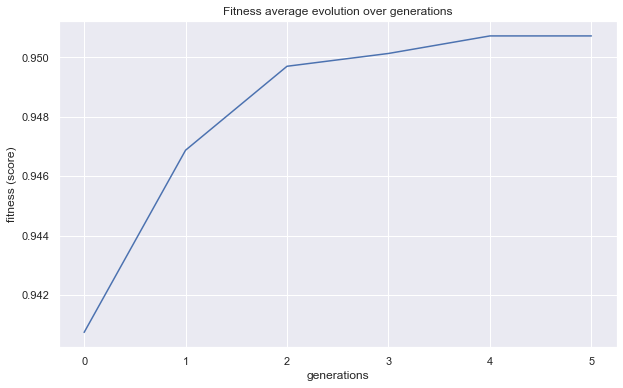

In [25]:
# from sklearn_genetic.plots import plot_fitness_evolution
plt.figure(figsize=(10, 6))
plot = plot_fitness_evolution(RF_GA_search, metric="fitness")
plt.show()

In [26]:
results = pd.DataFrame(RF_GA_search.cv_results_).sort_values(by = 'rank_test_score')
results.head(3)

,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score,rank_train_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params
41,True,gini,6,sqrt,93,218,41,0.950726,0.950726,0.0,1,0.965769,0.965769,0.0,23,1.054204,0.0,0.018949,0.0,"{'bootstrap': True, 'criterion': 'gini', 'max_..."
42,True,gini,6,sqrt,93,218,41,0.950726,0.950726,0.0,1,0.965769,0.965769,0.0,23,0.994980,0.0,0.013943,0.0,"{'bootstrap': True, 'criterion': 'gini', 'max_..."
53,True,gini,6,sqrt,93,218,41,0.950726,0.950726,0.0,1,0.965769,0.965769,0.0,23,0.952458,0.0,0.011958,0.0,"{'bootstrap': True, 'criterion': 'gini', 'max_..."


In [27]:
results_cv2 = pd.DataFrame(RF_GA_search.cv_results_)
results_cv2  = results_cv2[['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
# plot_learning_curve_cross_validation(results_cv2, "RF learning curve - GASearchCV")
results_cv2.head()

,mean_test_score,std_test_score,mean_train_score,std_train_score
0,0.936134,0.0,0.955205,0.0
1,0.940949,0.0,0.956675,0.0
2,0.944300,0.0,0.959360,0.0
3,0.947436,0.0,0.962448,0.0
4,0.935585,0.0,0.955063,0.0


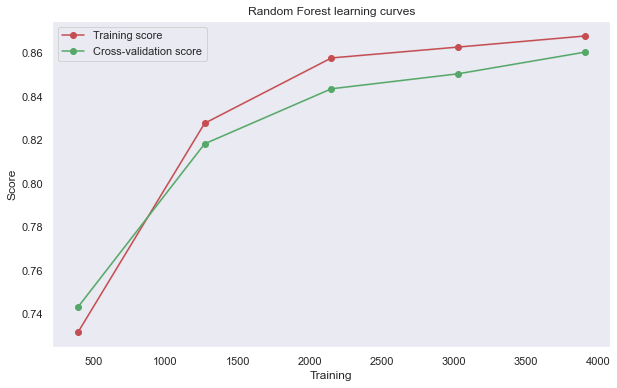

In [29]:
g = plot_learning_curve(RF_best,"Random Forest learning curves",X_train_3, y_train,cv=cv)

Curva ROC-AUC

In [52]:
def plot_roc(model, l):
    #fit logistic regression model and plot ROC curve
    model.fit(X_train_3, y_train)
    y_pred = model.predict_proba(X_test_3)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label=l+ " , AUC="+str(auc))

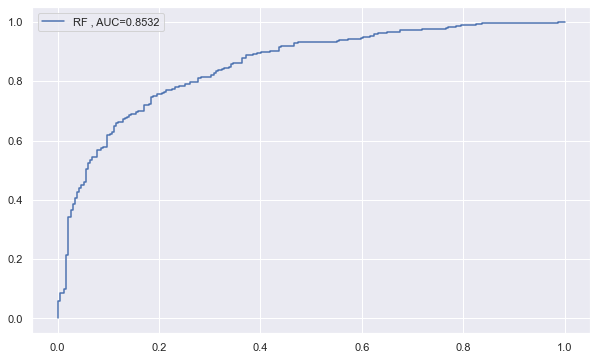

In [53]:
labels = ['RF']
models = [RF_best]

#set up plotting area

plt.figure(figsize=(10, 6)).clf()

for i, j in enumerate(models):

    plot_roc(j, labels[i])


#add legend
plt.legend()

In [98]:
y_pred = RF_best.predict_proba(X_train_3)

In [99]:
y_pred 

array([[0.68498357, 0.31501643],
       [0.40828528, 0.59171472],
       [0.83998249, 0.16001751],
       ...,
       [0.14818032, 0.85181968],
       [0.09769239, 0.90230761],
       [0.10505078, 0.89494922]])

In [100]:
inferencia = pd.DataFrame(y_pred, columns=["NORMAL", "PNEUMONIA"])

In [101]:
inferencia['y'] = np.array(y_train)

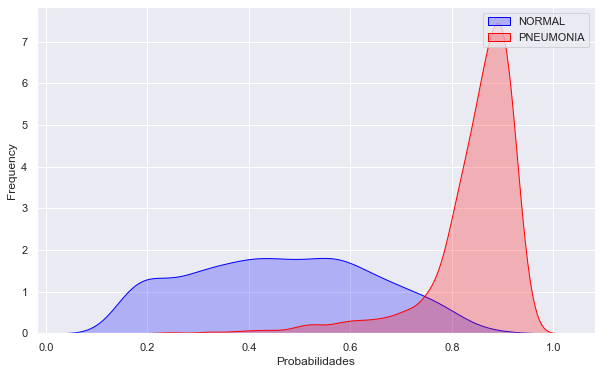

In [102]:
plt.figure(figsize=(10, 6))
g = sns.kdeplot(inferencia["PNEUMONIA"][(inferencia["y"] == 0) & (inferencia["y"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(inferencia["PNEUMONIA"][(inferencia["y"] == 1) & (inferencia["y"].notnull())], ax =g, color="Red", shade= True)
g.set_xlabel("Probabilidades")
g.set_ylabel("Frequency")
g = g.legend(["NORMAL", "PNEUMONIA"])
plt.show()

In [103]:
y_pred = RF_best.predict_proba(X_train_3)
y_pred = pd.DataFrame(y_pred, columns=["NORMAL", "PNEUMONIA"])
y_pred_opt = y_pred.PNEUMONIA.apply(lambda x: 1 if x>=0.77 else 0)

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.96      0.82      1341
           1       0.98      0.87      0.92      3875

    accuracy                           0.89      5216
   macro avg       0.85      0.91      0.87      5216
weighted avg       0.91      0.89      0.90      5216

Gini:  0.8256519208101805
ROC AUC::  0.9128259604050902


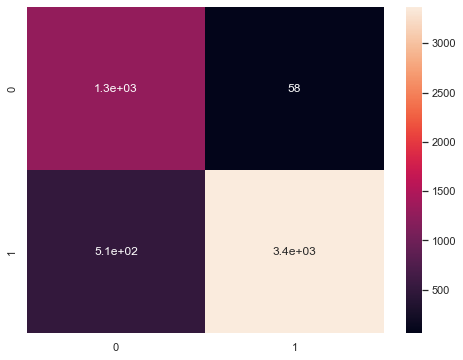

In [104]:
cm = confusion_matrix(y_train, y_pred_opt)
cm_df = pd.DataFrame(cm)                      
plt.figure(figsize=(8,6))  
sns.heatmap(cm_df, annot=True)
print("Classification Report: \n", classification_report(y_train, y_pred_opt))  


roc_auc = roc_auc_score(y_train, y_pred_opt, multi_class = 'ovr', average=None)
gini = 2*roc_auc -1
print("Gini: ",gini)
print("ROC AUC:: ",roc_auc)

In [95]:
confusion_matrix(y_train, y_pred_opt)

array([[1283,   58],
       [ 508, 3367]], dtype=int64)

In [96]:
# fit_and_print(RF_best, X_val)

In [97]:
y_pred = RF_best.predict_proba(X_test_3)
y_pred = pd.DataFrame(y_pred, columns=["NORMAL", "PNEUMONIA"])
y_pred_opt = y_pred.PNEUMONIA.apply(lambda x: 1 if x>=0.77 else 0)

In [88]:
y_pred

,NORMAL,PNEUMONIA
0,0.588653,0.411347
1,0.285452,0.714548
2,0.250611,0.749389
3,0.209576,0.790424
4,0.295268,0.704732
...,...,...
619,0.128928,0.871072
620,0.156120,0.843880
621,0.131702,0.868298
622,0.087453,0.912547


In [89]:
y_pred_opt.value_counts()

1    416
0    208
Name: PNEUMONIA, dtype: int64

In [90]:
y_pred.PNEUMONIA

0      0.411347
1      0.714548
2      0.749389
3      0.790424
4      0.704732
         ...   
619    0.871072
620    0.843880
621    0.868298
622    0.912547
623    0.818302
Name: PNEUMONIA, Length: 624, dtype: float64

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.65      0.69       234
           1       0.81      0.86      0.83       390

    accuracy                           0.78       624
   macro avg       0.77      0.76      0.76       624
weighted avg       0.78      0.78      0.78       624

Gini:  0.512820512820513
ROC AUC::  0.7564102564102565


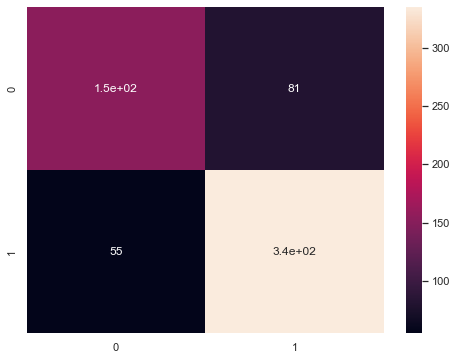

In [91]:
cm = confusion_matrix(y_test, y_pred_opt)
cm_df = pd.DataFrame(cm)                      
plt.figure(figsize=(8,6))  
sns.heatmap(cm_df, annot=True)
print("Classification Report: \n", classification_report(y_test, y_pred_opt))  


roc_auc = roc_auc_score(y_test, y_pred_opt, multi_class = 'ovr', average=None)
gini = 2*roc_auc -1
print("Gini: ",gini)
print("ROC AUC:: ",roc_auc)

In [92]:
confusion_matrix(y_test, y_pred_opt)

array([[153,  81],
       [ 55, 335]], dtype=int64)

base de validação

In [44]:
y_pred = RF_best.predict_proba(X_val_3)
y_pred = pd.DataFrame(y_pred, columns=["NORMAL", "PNEUMONIA"])
y_pred_opt = y_pred.PNEUMONIA.apply(lambda x: 1 if x>=0.77 else 0)

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.78      0.88      0.82         8

    accuracy                           0.81        16
   macro avg       0.82      0.81      0.81        16
weighted avg       0.82      0.81      0.81        16

Gini:  0.625
ROC AUC::  0.8125


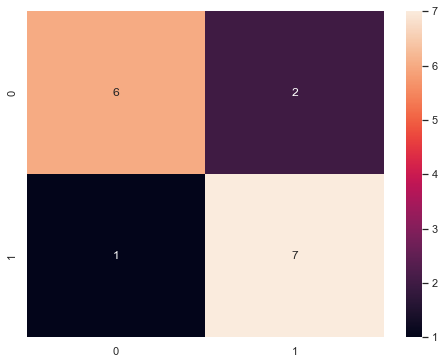

In [45]:
cm = confusion_matrix(y_val, y_pred_opt)
cm_df = pd.DataFrame(cm)                      
plt.figure(figsize=(8,6))  
sns.heatmap(cm_df, annot=True)
print("Classification Report: \n", classification_report(y_val, y_pred_opt))  


roc_auc = roc_auc_score(y_val, y_pred_opt, multi_class = 'ovr', average=None)
gini = 2*roc_auc -1
print("Gini: ",gini)
print("ROC AUC:: ",roc_auc)

In [46]:
import pickle
pickle.dump(pca, open( "pca.pickle", "wb" ))
pickle.dump(std, open( "std.pickle", "wb" ))

import joblib
filename = 'resnet_images.sav'
joblib.dump(RF_best, filename)

['resnet_images.sav']